<a href="https://colab.research.google.com/github/Carlageo9/Practica_2_Random_WalksII/blob/main/Practica_2_RandomWalksII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tópico de Industria I - Tarea 2**

In [3]:
# Módulos: importamos las librerías necesarias para ejecutar las funciones.
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import exponweib

import plotly.graph_objects as go
#### Nuevos módulos
import pandas as pd

from scipy.stats import levy_stable

In [4]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curvas

● Generar al menos las 4 curvas de distribución tipo Lévy stable y graficarlas en una sola figura con plotly.

● Cada una de las curvas corresponde a un valor distinto de alpha.

● Considere los siguientes parametros para las curvas a generar: m = 3.0, beta = 0.

In [5]:
#Parámetros
m = 3.0
beta = 0
resolution = 500
aux_domain = np.linspace(-2,8,resolution)
#alpha_array = [0.3, 0.5, 0.7, 0.9]
alpha_array = [0.1, 0.5, 1.0, 1.9]

def levy_stable_pdf(x, alpha, beta, m, c):
    return np.exp(-c * np.abs(x - m) ** alpha)

fig_levy_stable = go.Figure()

for alpha in alpha_array:
    levy_stable_pdf_values = levy_stable_pdf(aux_domain, alpha, beta, m, 3.0)
    fig_levy_stable.add_trace(go.Scatter(x=aux_domain,
                                         y=levy_stable_pdf_values,
                                         mode='lines',
                                         name=f'Alpha = {alpha}',
                                         showlegend=True))

# Configuraciones adicionales
fig_levy_stable.update_layout(title='Distribución Lévy Stable',
                              xaxis_title='X',
                              yaxis_title='Probability Density',
                              legend=dict(title='Alpha'))

# Mostrar la figura
fig_levy_stable.show()



# Lévy distribution - Histograma + Curva

● A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.

● Visualizar con matplotlib.



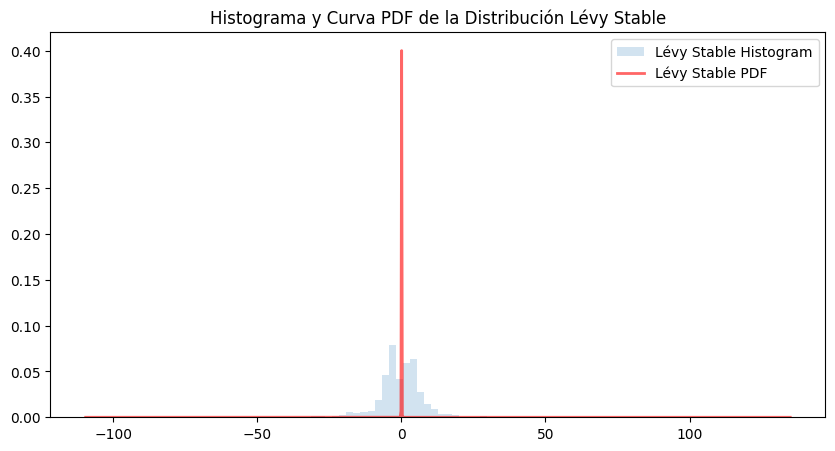

In [12]:
# Parámetros de la distribución Lévy stable
alpha = 2.5
beta = 0
sample_size = 1000

# Generar valores aleatorios de una distribución Cauchy estándar
cauchy_values = np.random.standard_cauchy(size=sample_size)

# Aplicar la transformación para obtener una distribución Lévy stable
levy_stable_values = np.pi * alpha / 2 * (1 + beta * np.sign(cauchy_values)) * cauchy_values / np.abs(cauchy_values) ** (1 / alpha)

r = levy_stable_values

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

hist_values, bin_edges, _ = ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Lévy Stable Histogram')

# Obtener valores de la PDF manualmente
aux_domain = np.linspace(min(bin_edges), max(bin_edges), 1000)
levy_stable_pdf_values = (np.pi * alpha / 2) / (np.abs(aux_domain) ** (1 + alpha))

# Normalizar la PDF para que coincida con el histograma
levy_stable_pdf_values /= np.sum(levy_stable_pdf_values) * (bin_edges[1] - bin_edges[0])

# Graficar la curva PDF
ax.plot(aux_domain, levy_stable_pdf_values, 'r-', lw=2, alpha=0.6, label='Lévy Stable PDF')

# Desplegar leyendas
ax.legend(loc='best')

plt.title('Histograma y Curva PDF de la Distribución Lévy Stable')
plt.show()

# Lévy flight - Vec2d - 1 Trayectoria
● Generar una trayectoria tipo Lévy.

● Utilizar Vec2d.

● Guardar trayectoria en pandas Data Frame.

● Visualizar proyección en 3D con plotly.

In [13]:
# Init variables
std_motion_steps = 5.0
Levy_exponent = 1.2
beta = 1.0
speed = 1
m = 5

veloci

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, 400)

Levy_pdf = np.array([levy_stable.pdf(i, alpha=Levy_exponent, beta=beta, loc=std_motion_steps) for i in aux_domain])

fig_Levy_pdf = go.Figure()

fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                       y = Levy_pdf,
                                       marker = dict(size = 2),
                                       mode = 'lines',
                                       name = 'Levy_{}'.format(Levy_exponent),
                                       showlegend = True))